# Project Outline And Preliminary Dataset

### Research Problem Description

The project will research content sentiments relating to COVID-19 after it has been discovered by human-beings and focus on articles and news posted by mainstream media in the United State, and ultimately provide suggestions for media as well as public to prevent the COVID-19 from continuously spreading in the United State. The database is extracted from Kaggle public database repository, the content obtained bewteen January 3, 2020 to September 14, 2020. To check the introduction please click [here](introduction.md).

### Dataset Pre-process

After imported the dataset from the local file, I have already done the basic cleaning of the dataset by Excel. More specifically, I have eliminated articles that published out of states, and took out the duplicated records.

In the pre-process section here, I'm going to read the dataset and construct a dictionary to store fields that I need and do the basic operation to remove noisy records, and list several features of the dataset.

In [1]:
import csv
import re

# Create the dictionary.
contents = {}

# Set the limit of csv although technically we will only has 9 fields, there could be noises in the dataset.
csv.field_size_limit(10000000)

# Read the local document.
with open('../dataset/covid19_articles_20200914.csv', newline = '') as f:                                                                                          
    csvreader = csv.reader(f, delimiter=',')
    
    # We'll use i represents how many records occur in the dataset, so we need to declare it outside of for loop.
    i = 0
    # Iterate the records(lines).
    for i, line in enumerate(csvreader):
        # The first line is header. We don't need it.
        if i == 0:
            continue
        else:
            # First line means index, if it's not a number, it must be a noise.
            # Fifth line means publish date, if it's not a date, it must be a noise. Date format: yyyy-mm-dd
            # Ignore the noises.
            if not re.match("^\d+$", line[0]) or not re.match("^2020\-(0[1-9]|1[0-2])\-(3[0-1]|[0-2][1-9])$", line[4]):
                continue
            
            # Construct the JOSN document to store our records.
            contents[int(line[0])] = {}
            contents[int(line[0])]["date"] = line[4]
            contents[int(line[0])]["source"] = line[5]
            contents[int(line[0])]["title"] = line[1]
            contents[int(line[0])]["content"] = line[7]
            contents[int(line[0])]["label"] = line[8]

# Print how many records have been extracted from the csv document.
print("Finally, we got", len(contents), "from", i, "records.")

Finally, we got 271626 from 290479 records.


Cool, we eliminated around 20000 noises and got a cleaner dataset. Let's peek at a sample record:

In [2]:
contents[100]

{'date': '2020-01-21',
 'source': 'cnbc',
 'title': 'CDC announces first US case of coronavirus that killed 17 in China',
 'content': 'Public health officials have confirmed the first U.S. case of a mysterious coronavirus that has sickened hundreds of people in China, the Centers for Disease Control and Prevention (CDC) said Tuesday. A Snohomish County, Washington State resident who was returning from China on Jan. 15 was diagnosed with the Wuhan coronavirus, according to the CDC. Officials said the patient, a male in his 30s, is "very healthy." He is currently being isolated at a medical center in the state "out of caution" and "poses little risk" to the public, they said. The CDC said the man reached out to local health authorities last week once he started experiencing pneumonia-like symptoms. "We\'re being proactive at all levels," Nancy Messonnier, CDC\'s director of the National Center for Immunization and Respiratory Diseases, said on a conference call with reporters Tuesday. "C

Alright, things go smooth. Now let's explore the dataset a little bit. First, let's get the time period of the dataset.

In [3]:
# Initialize the variables.
maxMonth = -1
minMonth = 13
minDay = 32
maxDay = -1

# Generate the date period in the whole dataset. As I already know they all in 2020, so I emitted the year variable.
for i,j in contents.items():
    date = j["date"].split("-")
    month = int(date[1])
    day = int(date[2])
    
    if month > maxMonth:
        maxMonth = month
        maxDay = -1
    elif month == maxMonth:
        maxDay = max(maxDay, day)
    
    if month < minMonth:
        minMonth = month
        minDay = 32
    elif month == minMonth:
        minDay = min(minDay, day)
        
print("The time period of the dataset is:",minMonth, "-", minDay, "to", maxMonth, "-", maxDay)

The time period of the dataset is: 1 - 3 to 9 - 14


Let's peek at the distribution on date:

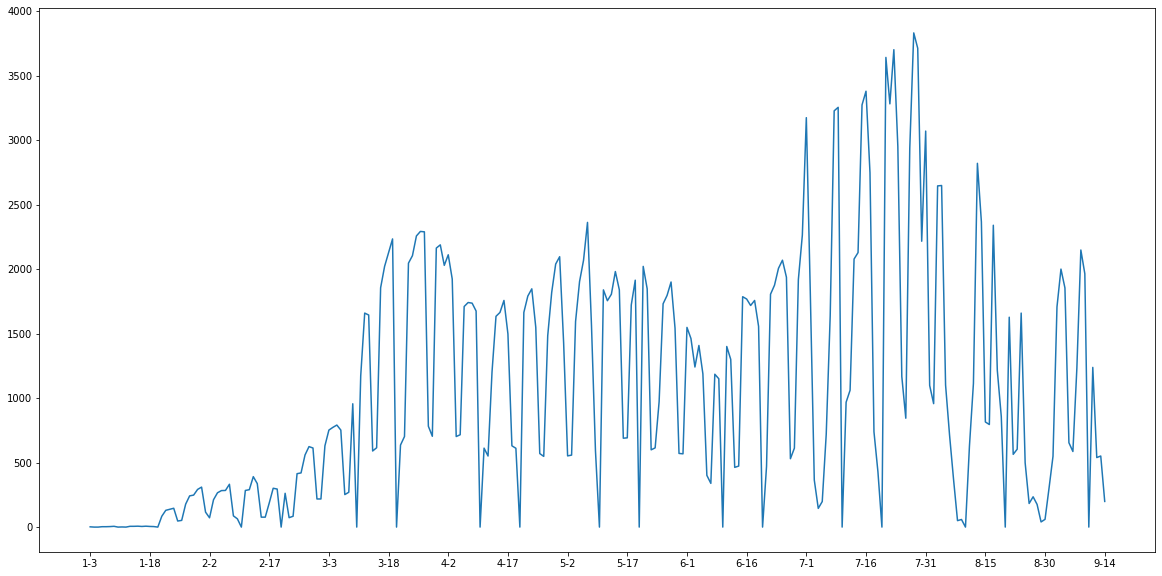

In [4]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator

# Initialize the variables.
day = 3
month = 1
count = 0
countStore = []
# Store the days in every month in our dataset. As we have no date later than 9-14, so we store a 14 for September.
dayEachMonth = [31, 29, 31, 30, 31, 30, 31, 31, 14] 
X = []

# Generate the X-axis.
for i in range(1, 10):
    currentDay = 1
    if i == 1:
        currentDay = 3
    
    while currentDay <= dayEachMonth[i - 1]:
        X.append(str(i) + "-" + str(currentDay))
        currentDay += 1

# Count cases for every single day.
for i in X:
    count = 0
    for j in contents.values():
        date = j["date"].split("-")
        if(int(date[1]) == int(i.split("-")[0]) and int(date[2]) == int(i.split("-")[1])):
            count += 1
    countStore.append(count)

# Draw the distribution.
plt.figure(figsize = (20,10))
plt.gca().xaxis.set_major_locator(MultipleLocator(15))
plt.plot(X, countStore)
plt.show()

We can easily get a trend in related articles posting: March is the small peak of article posting, and July is the second and have more volumes than March.

Now let's have a look on the raw labels:

In [5]:
label = {}

# Put all labels as key in the dictionary and count how many cases in each label.
for i in contents.values():
    if i["label"] in label:
        label[i["label"]] += 1
    else:
        label[i["label"]] = 1
        
print(label)

{'business': 196698, 'general': 49673, 'science': 1807, 'finance': 18531, 'tech': 3966, 'healthcare': 372, 'automotive': 252, 'environment': 313, 'ai': 14}


Thus we can know, the most thing they are talking about is "business" in COVID-19. Sure enough, humans are more caring about the economy. This is just the raw label, I will subdivide the label in my study.

Before we do the last step, let's simply change all our contents and titles into lowercases, and regularize all different format of space into "\s".

In [6]:
for i in contents.values():
    i["title"] = i["title"].lower()
    i["content"] = i["content"].lower()
    i["content"] = re.sub("(/t|/n)+", "/s", i["content"])
    
print(contents[100])

{'date': '2020-01-21', 'source': 'cnbc', 'title': 'cdc announces first us case of coronavirus that killed 17 in china', 'content': 'public health officials have confirmed the first u.s. case of a mysterious coronavirus that has sickened hundreds of people in china, the centers for disease control and prevention (cdc) said tuesday. a snohomish county, washington state resident who was returning from china on jan. 15 was diagnosed with the wuhan coronavirus, according to the cdc. officials said the patient, a male in his 30s, is "very healthy." he is currently being isolated at a medical center in the state "out of caution" and "poses little risk" to the public, they said. the cdc said the man reached out to local health authorities last week once he started experiencing pneumonia-like symptoms. "we\'re being proactive at all levels," nancy messonnier, cdc\'s director of the national center for immunization and respiratory diseases, said on a conference call with reporters tuesday. "cdc 

Great! We made it. Now let's explore the last feature: How many records directly use the COVID-19 related words. Thus we can know if they are all relating to our research.

In [7]:
regex = "covid|corona|virus|sars|epidemic"

count = 0
noCases = []
for j, i in contents.items():
    if re.search(regex, i["title"]):
        count += 1
        continue
    if re.search(regex, i["content"]):
        count += 1
        continue
    noCases.append(j)

print(count)

271626


Alright. Now we know every items are valuable for our research. This is the preliminary section of my project, and thanks for taking time to read it!

# Data Cleaning and Model Training Code Sheet

### Introduction

The methodology has been updated into a word document called `Sentiment on Social Media Platforms via COVID` in the same folder with this document `/project/paperAndNotebookFiles`. As the methodology has graphs and equations that cannot easily be transformed into a Markdown file, I haven't attached a markdown file in this submission.

### Clean the data

In [8]:
import random
import csv
import re
import time
import requests
from bs4 import BeautifulSoup
import json

In [9]:
# Create the dictionary.
contents = {}

# Set the limit of csv although technically we will only has 9 fields, there could be noises in the dataset.
csv.field_size_limit(10000000)

# Read the local document.
with open('../dataset/covid19_articles_20200914.csv', newline = '') as f:                                                                                          
    csvreader = csv.reader(f, delimiter=',')
    
    # We'll use i represents how many records occur in the dataset, so we need to declare it outside of for loop.
    i = 0
    # Iterate the records(lines).
    for i, line in enumerate(csvreader):
        # The first line is header. We don't need it.
        if i == 0:
            continue
        else:
            # First line means index, if it's not a number, it must be a noise.
            # Fifth line means publish date, if it's not a date, it must be a noise. Date format: yyyy-mm-dd
            # Ignore the noises.
            if not re.match("^\d+$", line[0]) or not re.match("^2020\-(0[1-9]|1[0-2])\-(3[0-1]|[0-2][1-9])$", line[4]):
                continue
            
            # Construct the JOSN document to store our records.
            contents[int(line[0])] = {}
            contents[int(line[0])]["date"] = line[4]
            contents[int(line[0])]["source"] = line[5]
            contents[int(line[0])]["title"] = line[1]
            contents[int(line[0])]["content"] = line[7]
            contents[int(line[0])]["label"] = line[8]

# Print how many records have been extracted from the csv document.
print("Finally, we got", len(contents), "from", i, "records.")

Finally, we got 271626 from 290479 records.


In [10]:
# # Get the topic dataset.
# topicDataset = []
# with open('../dataset/labelled_newscatcher_dataset.csv', newline = '') as f:                                                                                          
#     csvreader = csv.reader(f, delimiter=';')
#     for i, line in enumerate(csvreader):
#         if i == 0:
#             continue
#         else:
#             dictionaryTopic = {}
#             dictionaryTopic['topic'] = line[0]
#             dictionaryTopic['link'] = line[1]
#             dictionaryTopic['title'] = line[4]
#             topicDataset.append(dictionaryTopic)

In [11]:
# Get the sentiment dataset.
sentimentDataset = []
datasets = ["Reddit_Data.csv", "Twitter_Data.csv"]

for data in datasets:
    with open('../dataset/' + data, newline = '') as f:                                                                                          
        csvreader = csv.reader(f, delimiter=',')
        for i, line in enumerate(csvreader):
            if i == 0:
                continue
            else:
                try:
                    dictionaryTopic = {}
                    dictionaryTopic['sentiment'] = line[1]
                    dictionaryTopic['content'] = line[0]
                    sentimentDataset.append(dictionaryTopic)
                except:
                    print(data, i)
                
random.shuffle(sentimentDataset)

Twitter_Data.csv 130449
Twitter_Data.csv 155643
Twitter_Data.csv 155699
Twitter_Data.csv 155771
Twitter_Data.csv 158694
Twitter_Data.csv 159443
Twitter_Data.csv 160560


After cleaning up the data, datasets that we needed is now in the RAM and are ready to be used anytime! Now I'm going to fetch the content in links that specified in topic's dataset to extend the topic dataset to make a richer content for my topic model, although for now the information with title is enough.

In [12]:
# def getInformation(url, sleep_time = 0.1):
#     time.sleep(sleep_time/2)
#     try:
#         html = requests.get(url, timeout = sleep_time * 5).text
#         soup = BeautifulSoup(html,features="html.parser")
#         body = soup.find("body")
#         time.sleep(sleep_time/2)
   
    
#         content = ""
#         for record in body.find_all("p"):
#             handling = re.sub("<.*?>", " ", str(record))
#             handling = re.sub("[\n\t\s]+", " ", handling)
#             content += " " + handling
#         return content
#     except:
# #         print("time out")
#         return " "

In [13]:
# def saving(a):
#     print('Saving content document')
#     x = json.dumps(a)
#     f = open("../dataset/topicWithContent","w")
#     f.write(x)
#     f.close()

# swi = True
# for temp, i in enumerate(topicDataset):
#     i["content"] = getInformation(i["link"])
#     if temp % 10000 == 0:
#         print(temp, "/", len(topicDataset), "has been finished.")
#         saving(topicDataset)

In [14]:
# Got topic training dataset with Random Forest.
f = open("../dataset/topicWithContent","r")
topicDataset = json.load(f)
print(topicDataset[90001]["content"][0:200])
print("===========================================================================================================================")

  Watch TODAY All Day! Get the best news, information and inspiration from TODAY, all day long     Sections   Show   More   Follow today   Lifetime is gearing up to air its first holiday movie with an


In [15]:
topicDataset = topicDataset[0:100000]

After running for couple of days, the result has been saved into a local file and seems that it works well. To avoid the file fortuitously been covered leads to loss the data, I comment out all related codes: will not run them again, but put them here for your information.

In next steps, I'll prepare for the training set and parameters of the models and begin to train them:

In [16]:
# Random Forest Model.
# Clean the dataset, represent topics as numbers.

X, y = [], []
y_switch_case_like_dic = {"SCIENCE" : 0,
                          "BUSINESS" : 1,
                          "HEALTH" : 2,
                          "ENTERTAINMENT" : 3,
                          "TECHNOLOGY" : 4,
                          "WORLD" : 5,
                          "NATION" : 6,
                          "SPORTS" : 7}
for item in topicDataset:
    temp = item["title"]
    temp += " " + item["content"]
    X.append(temp)
    y.append(y_switch_case_like_dic[item["topic"]])


In [17]:
print(len(X))
print(X[1004])
print(len(y))
print(y[999:1012])

100000
Experimental coronavirus vaccine prevents severe disease in mice  
100000
[2, 4, 2, 0, 2, 2, 2, 0, 4, 4, 2, 2, 2]


In [18]:
a = set([])
for item in topicDataset:
    if item["topic"] not in a:
        a.add(item["topic"])
print(a)

{'NATION', 'SCIENCE', 'TECHNOLOGY', 'HEALTH', 'WORLD', 'SPORTS', 'BUSINESS', 'ENTERTAINMENT'}


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

In [20]:
type(contents)

dict

In [21]:
content2 = {}
idx = 0
for keys in contents.keys():
    content2[idx] = contents[keys]
    idx += 1

# Import the main dataset to form the word vector.
X_main = []
for index in range(len(content2)):
    item = content2[index]
    temp = item['title']
    temp += " " + item['content']
    X_main.append(temp)

In [22]:
# Divide the vector by their datasets.
train_size = len(X)
apply_size = len(X_main)
combine = X + X_main
vectorizer = CountVectorizer()
combine_vector = vectorizer.fit_transform(combine)
X = combine_vector[:train_size]
X_main_rf = combine_vector[train_size:]

In [23]:
# Train model and evaluate.
X_t, X_te, Y_t, Y_te = train_test_split(X, y, test_size = 0.2, random_state = 123)
model = RandomForestClassifier(max_depth=None, bootstrap=True)
model.fit(X_t, Y_t)
predict = model.predict(X_te)
possibilities = model.predict_proba(X_te)

# Compute the accuracy.
count = 0
for i in range(20000):
    if predict[i] == Y_te[i]:
        count += 1
print("accuracy =", int(count/20000 * 1000) / 10, "%")

# Compute the loss.
loss = 0
for i, j in enumerate(possibilities):
    loss += 1 - j[Y_te[i]]

loss /= len(possibilities)
print("losses = ", loss)

accuracy = 77.6 %
losses =  0.5243074641363559


As we can see, the accuracy is acceptable and this will be the final model using for future topic classification. Plz note that, as we have 6 labels and the loss of a random prediction is 73.4%, so a 50% loss makes sense and is kind of acceptable. Next, I'm going to train the sentiment model.

In [24]:
# The LR model and the Naive Biase model.
Y = []
X = []
for entry in sentimentDataset:
    if entry["sentiment"] == "0":
        continue
    else:
        X.append(entry["content"])
        Y.append(entry["sentiment"])

print(len(X), "values are using for training.")

131867 values are using for training.


In [25]:
# Generate the vectors.
train_size = len(X)
apply_size = len(X_main)
combine = X + X_main
vectorizer = CountVectorizer()
combine_vector = vectorizer.fit_transform(combine)
X = combine_vector[:train_size]
X_main_lr = combine_vector[train_size:]

/Users/shry398828336/shenruo2/project/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


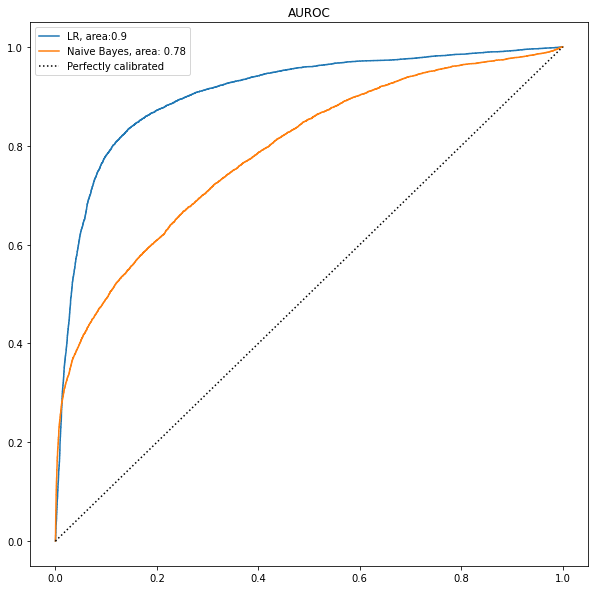

Accuracy of LR: 85.8 % and accuracy of Naive Bayes: 69.5 %


In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from numpy import trapz
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, ElasticNet

# The loss AUROC compute function.
def roc2(predictions):
    # Initialize predict label of changing the threshold process
    label = []
    trueLabel = []
    fpr = []
    recall = []
    # Initialize all label of data as 0, and extract the actual label from the input argument.
    for i in range(0, len(predictions)):
        label.append(-1)
        trueLabel.append(predictions[i][1])
    # Calculate the initial confusion matrix.
    for i, j in enumerate(trueLabel):
        trueLabel[i] = int(j)
    cm = confusion_matrix(trueLabel, label)
    tn, fp, fn, tp = cm.ravel()

    # Everytime change the threshold, we got a new 1 come from 0. So we just need to consider the actual label and modify corresponding cell of matrix.
    for i in range(0, len(predictions)):
        if trueLabel[i] == 1:
            tp += 1
            fn -= 1
        else:
            tn -= 1
            fp += 1

        # gather every fpr and recall rates.
        fpr.append(fp / (fp + tn))
        recall.append(tp / (tp + fn))

    return recall, fpr, trapz(fpr, recall, dx = 0.00001)

# Compute the accuracy by the prediction by a model.
def accuracy(predict, y):
    count = 0
    total = len(predict)
    for i in range(len(predict)):
        if predict[i] == y[i]:
            count += 1
    return count/total

# Apply both LR, and Naive Baise as the baseline, and generate their AUROC for evaluation.
# Split the dataset.
X_t, X_te, y_t, y_te = train_test_split(X, Y, test_size=0.2, random_state=123)

# Train the Naïve Bayes model and plot the AUROC, with the accuracy computed.
naive = MultinomialNB()
classifier = naive.fit(X_t,y_t)
predict = classifier.predict(X_te)
acc = accuracy(predict, y_te)
predictions = classifier.predict_proba(X_te)
# cm = confusion_matrix(y_te, predict)
# tn, fp, fn, tp = cm.ravel()
for j in range(0, len(predictions)):
    predictions[j][1] = y_te[j]
predictions = sorted (predictions, key = lambda  pre:-pre[0])
temp = roc2(predictions)

# Train the Logistic Regress model and plot the AUROC, with the accuracy computed.
logis = LogisticRegression(penalty='none', max_iter=1000)
classifier2 = logis.fit(X_t, y_t)
predict2 = classifier2.predict(X_te)
acc2 = accuracy(predict2, y_te)
predictions2 = classifier2.predict_proba(X_te)
prob_pos2 = classifier2.predict_proba(X_te)[:, 1]
fraction_of_positives2, mean_predicted_value2 = calibration_curve(y_te, prob_pos2, n_bins=10)
# cm2 = confusion_matrix(y_te, predict2)
# tn, fp, fn, tp = cm2.ravel()
for j in range(0, len(predictions2)):
    predictions2[j][1] = y_te[j]
predictions2 = sorted (predictions2, key = lambda  pre:-pre[0])
temp2 = roc2(predictions2)

# Plot the AUROC of both.
plt.figure(figsize=(10,10))
plt.title("AUROC")
plt.plot(temp2[0], temp2[1], label="LR, area:" + str(int(temp2[2]*100) / 100))
plt.plot(temp[0], temp[1], label="Naive Bayes, area: " + str(int(temp[2]*100) / 100)) 
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.legend()
plt.show()

# Print the accuracy of both.
print("Accuracy of LR:", int(acc2*1000) / 10,"%", "and accuracy of Naive Bayes:", int(acc*1000) / 10, "%")

As we can see, Logistic Regression model, the model that we'll use for the main dataset, has a 86% accuracy and a 0.87 AUROC. For comparation, Naive Bayes model, as the base line, has a 70% accuracy and a 0.79 AUROC, which means LR has a significant better performance on this task.

So far, we've trained all models that I need to use in the future, and ready to be used for analysing the main dataset. 

# Applying Model on the Main Database and Result

Our first task is to apply the model with our main dataset and generate their topics and sentiments, and roughly explore the result and get the common sense of the data we use. As we've already generated the vectors in the model training section, the only step that we need to do is to apply the model.

In [27]:
# Get the sentiments.
sentiment_lr = classifier2.predict(X_main_lr)

# Get the topics
topic = model.predict(X_main_rf)

tem = {"-1":0, "1":0}
for i in sentiment_lr:
    if i == "-1":
        tem["-1"] += 1;
    else:
        tem["1"] += 1
print("Negative labels have:", tem["-1"], "entries." + "(" + str(int((tem["-1"]/(tem['-1'] + tem['1'])) * 1000) / 10) + "%)")
print("Positive labels have:", tem["1"], "entries." + "(" + str(int((tem["1"]/(tem['-1'] + tem['1'])) * 1000) / 10) + "%)")
print("=============================================")

switch_decode_dic = {0 : "SCIENCE",
                     1 : "BUSINESS",
                     2 : "HEALTH",
                     3 : "ENTERTAINMENT",
                     4 : "TECHNOLOGY",
                     5 : "WORLD",
                     6 : "NATION",
                     7 : "SPORTS"}

record = {}
for i in topic:
    if switch_decode_dic[i] in record:
        record[switch_decode_dic[i]] += 1
    else:
        record[switch_decode_dic[i]] = 0

for i in record.keys():
    record[i] = str(record[i]) + "(" + str(int(record[i] / len(topic) * 1000) / 10) + "%)"
print(record)

Negative labels have: 32666 entries.(12.0%)
Positive labels have: 238960 entries.(87.9%)
{'BUSINESS': '130932(48.2%)', 'HEALTH': '56510(20.8%)', 'WORLD': '28640(10.5%)', 'ENTERTAINMENT': '18330(6.7%)', 'NATION': '12964(4.7%)', 'TECHNOLOGY': '6766(2.4%)', 'SCIENCE': '448(0.1%)', 'SPORTS': '17028(6.2%)'}


For the sentiment, we now know that there are much more positive news than negative news. This can be explained as more new publishers have a possitive or at least neutral attitude on the COVID-19. But negative messages are usually more attractive to publics, thus we cannot simply draw a conclusion that most publics' attitudes are positive.

For the topic, we can see almost 50% news are related to bussiness, which rank no.1 have the most buzzes. Then follows the health messages(around 20%), world related messages(around 10%), and others.

Note that, science related news only have 448 buzzes, which can lead a shortage of sample problem for future research. Thus, next step is to remove all news with science topics. To achieve this, we need to combine two features and then apply a filter.

In [28]:
for index in range(len(content2)):
    content2[index]["sentiment"] = sentiment_lr[index]
    content2[index]["topic"] = switch_decode_dic[topic[index]]
    if "label" not in content2[index]:
        print(index)
    del (content2[index]["label"])

In [30]:
print("before:", len(content2))
shouldRemove = []
for index in range(len(content2)):
    if content2[index]["topic"] == "SCIENCE":
        shouldRemove.append(index)

for index in range(len(shouldRemove) - 1, -1, -1):
    del content2[shouldRemove[index]]
    
print("after:", len(content2))

before: 271626
after: 271177


Okay! Now, let's calculate the sentiment ratio again to check if there are any differences.

In [31]:
positive = 0
negative = 0

for cont in content2.keys():
    if content2[cont]["sentiment"] == "-1":
        negative += 1
    else:
        positive += 1
print("Negative labels have:", negative, "entries." + "(" + str(int((negative/(positive + negative)) * 1000) / 10) + "%)")
print("Positive labels have:", positive, "entries." + "(" + str(int((positive/(positive + negative)) * 1000) / 10) + "%)")

Negative labels have: 32639 entries.(12.0%)
Positive labels have: 238538 entries.(87.9%)


Now, it's time to give a next big step! Let's combine two features and run a distribution on ratio of sentiments with topics, and use the total ratio of the sentiments as a baseline to evaluate the topics are possitive or negative, and each topic's sentiment changes by months.

In [32]:
sentiment_by_topic = {}
for cont in content2.keys():
    if content2[cont]["topic"] not in sentiment_by_topic:
        temp = {}
        temp['positive'] = 0
        temp['negative'] = 0
        sentiment_by_topic[content2[cont]["topic"]] = temp
    if content2[cont]["sentiment"] == "1":
        sentiment_by_topic[content2[cont]["topic"]]["positive"] += 1
    else:
        sentiment_by_topic[content2[cont]["topic"]]["negative"] += 1
        
for key, value in sentiment_by_topic.items():
    print(key, "have", str(value["positive"]) + "(" + str(int((value["positive"] / (value["positive"] + value["negative"])) * 1000)/10) + "%)", "positive news and", str(value["negative"]) + "(" + str(int((value["negative"] / (value["positive"] + value["negative"])) * 1000)/10) + "%)", "negative news.")

BUSINESS have 116543(89.0%) positive news and 14390(10.9%) negative news.
HEALTH have 49608(87.7%) positive news and 6903(12.2%) negative news.
WORLD have 23101(80.6%) positive news and 5540(19.3%) negative news.
ENTERTAINMENT have 17296(94.3%) positive news and 1035(5.6%) negative news.
NATION have 10598(81.7%) positive news and 2367(18.2%) negative news.
TECHNOLOGY have 6254(92.4%) positive news and 513(7.5%) negative news.
SPORTS have 15138(88.8%) positive news and 1891(11.1%) negative news.


In [33]:
months = []
for i in range(1,10):
    months.append({})

for cont in content2.keys():
    month = content2[cont]["date"].split('-')[1]
    month = int(month)
    senti = content2[cont]["sentiment"]
    topi = content2[cont]["topic"]
    if topi not in months[month-1]:
        months[month - 1][topi] = {}
        months[month - 1][topi]["positive"] = months[month - 1][topi]["negative"] = 0
    if senti == "-1":
        months[month - 1][topi]["negative"] += 1
    else:
        months[month - 1][topi]["positive"] += 1

In [34]:
months

[{'BUSINESS': {'positive': 734, 'negative': 105},
  'HEALTH': {'positive': 734, 'negative': 74},
  'WORLD': {'positive': 141, 'negative': 37},
  'ENTERTAINMENT': {'positive': 24, 'negative': 4},
  'NATION': {'positive': 8, 'negative': 2},
  'TECHNOLOGY': {'positive': 20, 'negative': 3},
  'SPORTS': {'positive': 39, 'negative': 1}},
 {'HEALTH': {'positive': 1711, 'negative': 243},
  'WORLD': {'positive': 687, 'negative': 183},
  'BUSINESS': {'positive': 3310, 'negative': 464},
  'TECHNOLOGY': {'positive': 141, 'negative': 28},
  'SPORTS': {'positive': 178, 'negative': 20},
  'ENTERTAINMENT': {'positive': 143, 'negative': 19},
  'NATION': {'positive': 62, 'negative': 21}},
 {'HEALTH': {'positive': 9128, 'negative': 1210},
  'BUSINESS': {'positive': 13490, 'negative': 2169},
  'WORLD': {'positive': 2979, 'negative': 749},
  'SPORTS': {'positive': 2018, 'negative': 217},
  'ENTERTAINMENT': {'positive': 2363, 'negative': 204},
  'NATION': {'positive': 1325, 'negative': 275},
  'TECHNOLOGY':

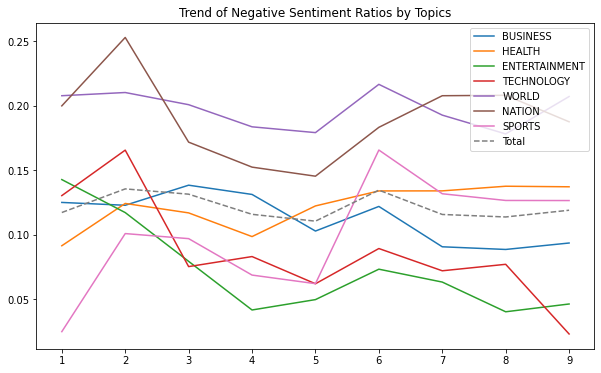

In [58]:
trend = {}
switch_decode_dic = {1 : "BUSINESS",
                     2 : "HEALTH",
                     3 : "ENTERTAINMENT",
                     4 : "TECHNOLOGY",
                     5 : "WORLD",
                     6 : "NATION",
                     7 : "SPORTS"}
for va in switch_decode_dic.values():
    trend[va] = []

for topic in trend.keys():
    for month in months:
        trend[topic].append(month[topic]["negative"] / (month[topic]["positive"] + month[topic]["negative"]))

plt.figure(figsize = (10,6))
plt.title("Trend of Negative Sentiment Ratios by Topics")
for topic in trend.keys():
    plt.plot(range(1,10), trend[topic], label = topic)

total = []

for month in months:
    sumP = 0
    sumN = 0
    for key in month.keys():
        sumP += month[key]["positive"]
        sumN += month[key]["negative"]
    total.append(sumN / (sumN + sumP))
plt.plot(range(1,10), total, "--", label = "Total")
plt.legend(loc = "upper right")
plt.show()

Till now, all essay needed features have been extracted for research, the code sheet for the essay will be ended here. For the insights of this essay, please check the whole text of essay in the `discussion` section. Note that, this code sheet is only the data handling part of the essay, and doesn't include any references or analyses. 

Thanks for reading.